In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.analysis.archive

/home/local/lib/python2.7/site-packages/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


updated file list


In [3]:
snms = kid_readout.analysis.archive.load_noise_pkl('/data/readout/pkl/2015-09-26_113109_compressor_noise_0.08_K.pkl')

In [86]:
for snm in snms:
    print snm.atten,snm.resonator_model.result.params.get('a',None)

35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None
35.0 None


In [1]:
2**22/(256e6/2**14)

268.435456

In [2]:
1/268.

0.0037313432835820895

In [3]:
2**22*16/1e6

67.108864

In [4]:
len(snms)

32

/home/local/lib/python2.7/site-packages/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


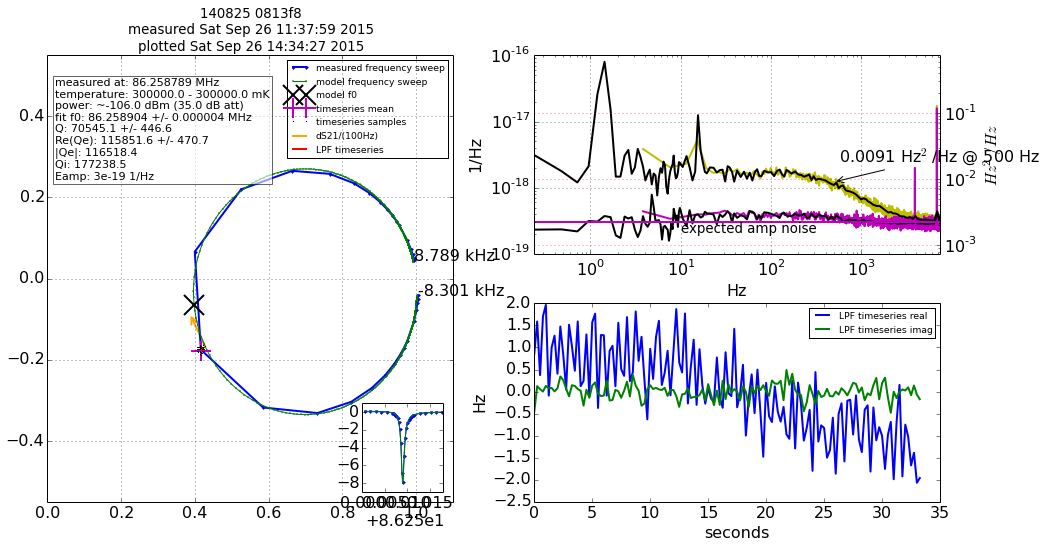

In [5]:
blah = snms[2].plot()

(1e-19, 1e-16)

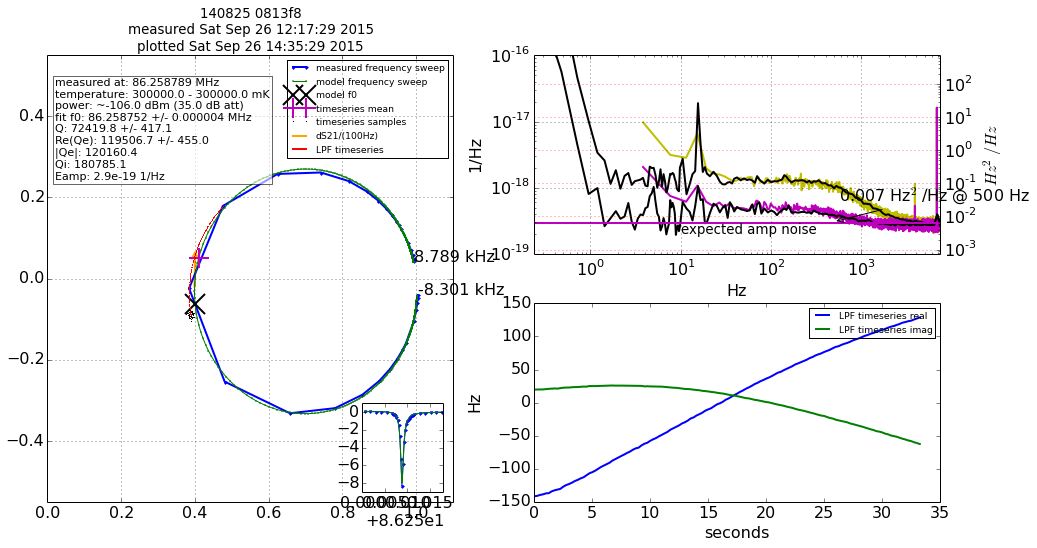

In [10]:
blah = snms[18].plot()
blah.axes[1].set_ylim(1e-19,1e-16)

In [7]:
s18 = snms[18]

In [30]:
ts = s18.normalized_timeseries[:]

In [11]:
lp = s18.low_pass_normalized_timeseries[:]

In [12]:
lp.shape

(134,)

In [26]:
x = np.arange(len(lp))*s18.low_pass_timestep

In [27]:
rcoef = np.polyfit(x,lp.real,4)
icoef = np.polyfit(x,lp.imag,4)

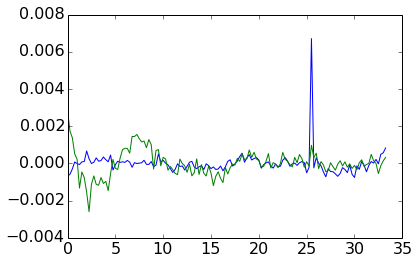

In [28]:
plot(x,lp.real-np.polyval(rcoef,x))
plot(x,lp.imag-np.polyval(icoef,x))

In [31]:
tsx = np.arange(len(ts))/s18.timeseries_sample_rate

In [34]:
tsc = (ts.real-np.polyval(rcoef,tsx)) + 1j*(ts.imag-np.polyval(icoef,tsx))+s18.normalized_timeseries_mean

In [35]:
import kid_readout.utils.despike

In [36]:
deglitched = kid_readout.utils.despike.deglitch_window(tsc,2**18,thresh=5)

In [46]:
import kid_readout.analysis.resonator
import kid_readout.analysis.iqnoise

In [39]:
detuning = kid_readout.analysis.resonator.normalized_s21_to_detuning(deglitched,s18.resonator_model)

In [44]:
sxx,fr = mlab.psd(detuning-detuning.mean(),NFFT=2**16,Fs=s18.timeseries_sample_rate)

In [50]:
s2 =snms[2]

10


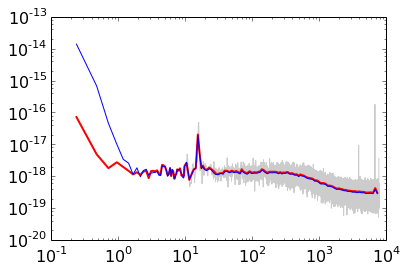

In [54]:
loglog(fr,sxx,color='k',alpha=0.2)
loglog(*kid_readout.analysis.iqnoise.log_bin(fr,sxx),color='r',lw=2)
loglog(s18.pca_freq,s18.pca_eigvals[1,:],color='b')

10


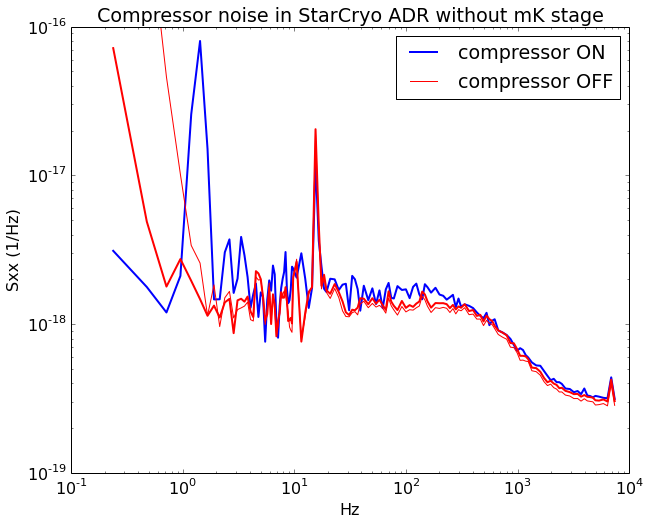

In [62]:
figure(figsize=(10,8))
loglog(s2.pca_freq,s2.pca_eigvals[1,:],label='compressor ON',lw=2)
loglog(s18.pca_freq,s18.pca_eigvals[1,:],label='compressor OFF',color='r')
legend(loc='upper right')
xlabel('Hz')
ylabel('Sxx (1/Hz)')
title('Compressor noise in StarCryo ADR without mK stage')
savefig('/home/gjones/paper_plots/2015-09-26-compressor-noise-reduction-without-stage.pdf',bbox_inches='tight')
ylim(1e-19,1e-16)
savefig('/home/gjones/paper_plots/2015-09-26-compressor-noise-reduction-without-stage-zoom.pdf',bbox_inches='tight')
#loglog(*kid_readout.analysis.iqnoise.log_bin(fr,sxx),color='r',lw=2)

#ax = gca()
#ax.axvline(15)

In [63]:
stage = kid_readout.analysis.archive.load_noise_pkl('/data/readout/pkl/2015-05-11_123358_compressor_noise.pkl')

In [64]:
len(stage)

32

In [65]:
son = stage[2]
soff = stage[18]

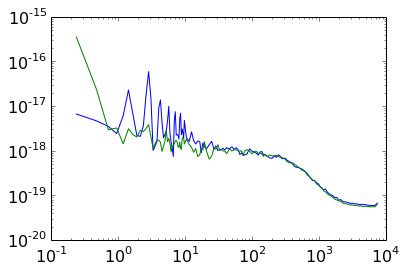

In [66]:
loglog(son.pca_freq,son.pca_eigvals[1,:])
loglog(soff.pca_freq,soff.pca_eigvals[1,:])


In [67]:
import glob

In [79]:
fns = glob.glob('/data/readout/pkl/2*compressor*.pkl')
fns.sort()
fns

['/data/readout/pkl/2015-01-16_162536_compressor_off_noise.pkl',
 '/data/readout/pkl/2015-01-16_164628_compressor_off_noise.pkl',
 '/data/readout/pkl/2015-01-16_170021_compressor_off_noise.pkl',
 '/data/readout/pkl/2015-05-06_130128_compressor_noise.pkl',
 '/data/readout/pkl/2015-05-06_132409_compressor_noise.pkl',
 '/data/readout/pkl/2015-05-06_135617_compressor_noise_3_K.pkl',
 '/data/readout/pkl/2015-05-11_123358_compressor_noise.pkl',
 '/data/readout/pkl/2015-05-11_150346_compressor_noise_60_s.pkl',
 '/data/readout/pkl/2015-05-11_152522_compressor_noise_60_s.pkl',
 '/data/readout/pkl/2015-05-11_195257_compressor_noise_60_s.pkl',
 '/data/readout/pkl/2015-06-05_184511_compressor_noise.pkl',
 '/data/readout/pkl/2015-07-06_161235_compressor_noise_0.100_K.pkl',
 '/data/readout/pkl/2015-07-06_164951_compressor_noise_0.120_K.pkl',
 '/data/readout/pkl/2015-07-06_173426_compressor_noise_0.140_K.pkl',
 '/data/readout/pkl/2015-07-06_182259_compressor_noise_0.160_K.pkl',
 '/data/readout/pkl/20

In [74]:
f = figure()

In [75]:
f.text?

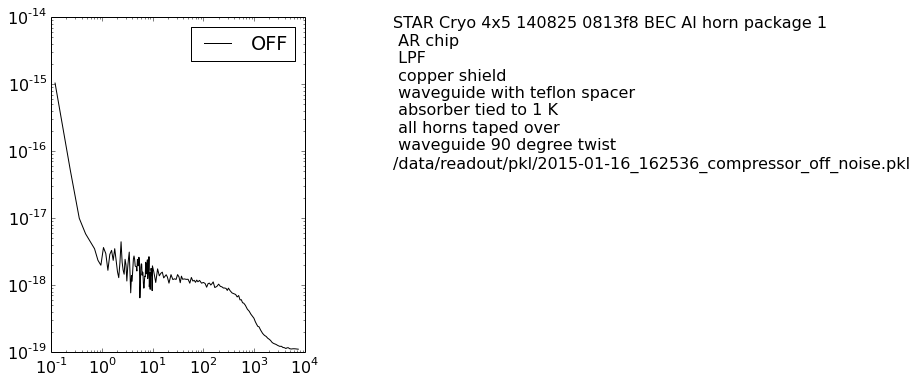

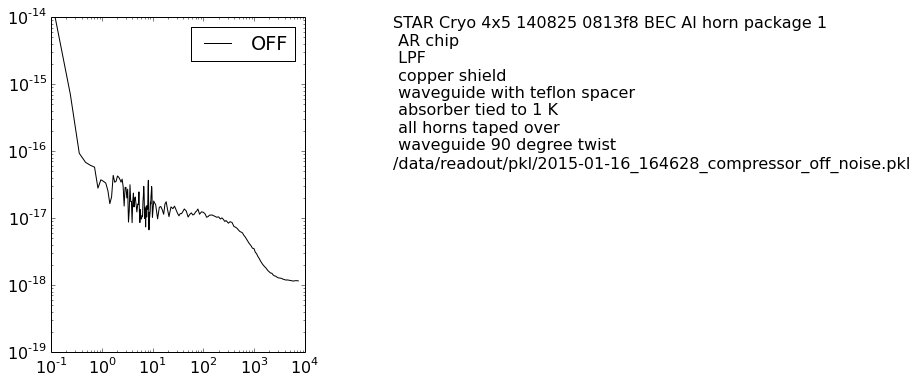

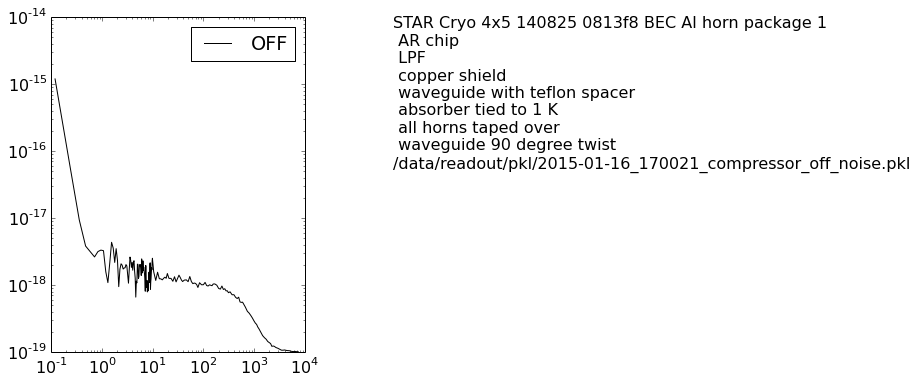

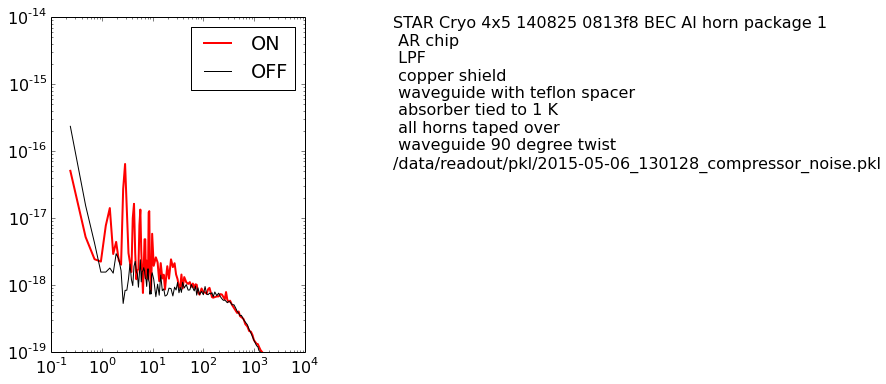

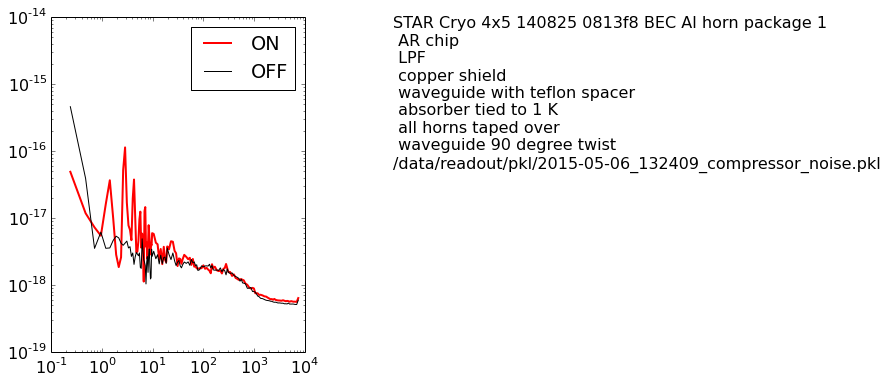

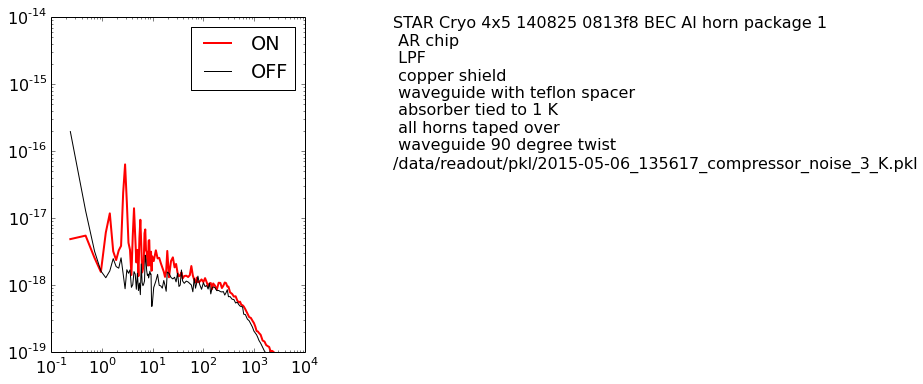

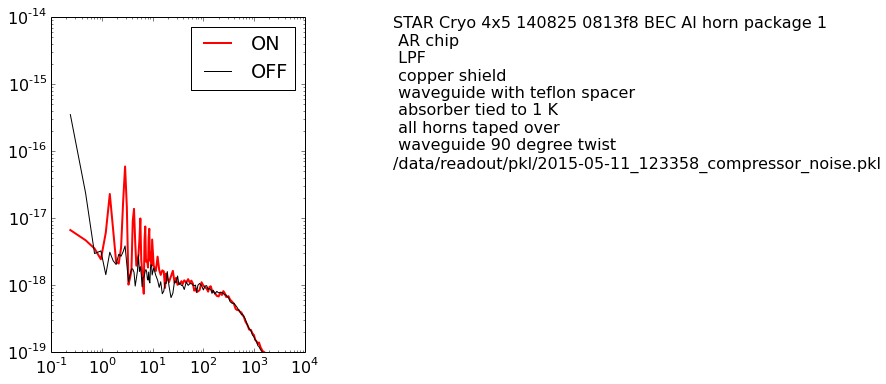

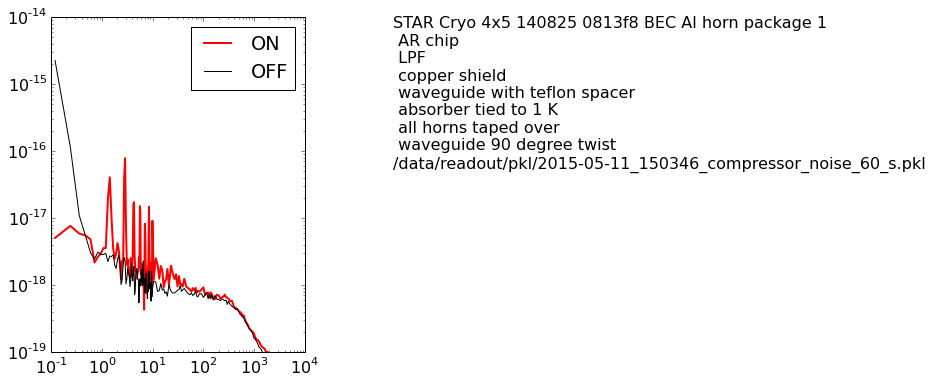

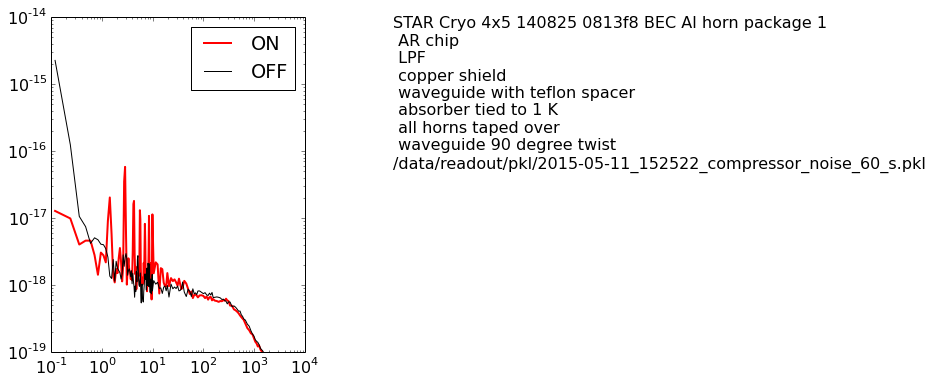

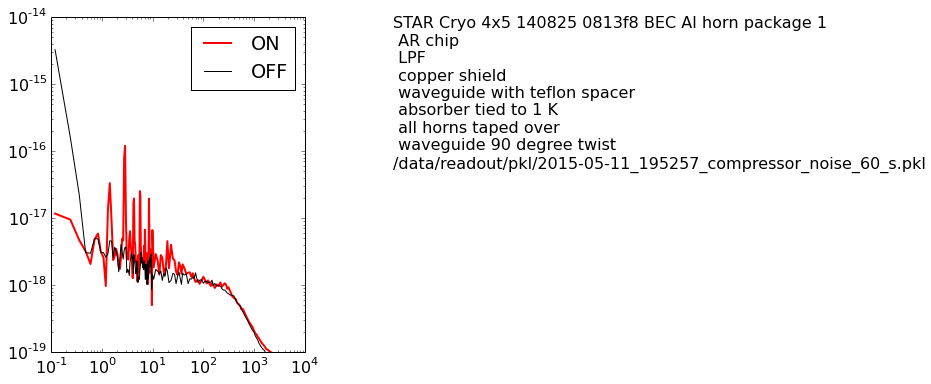

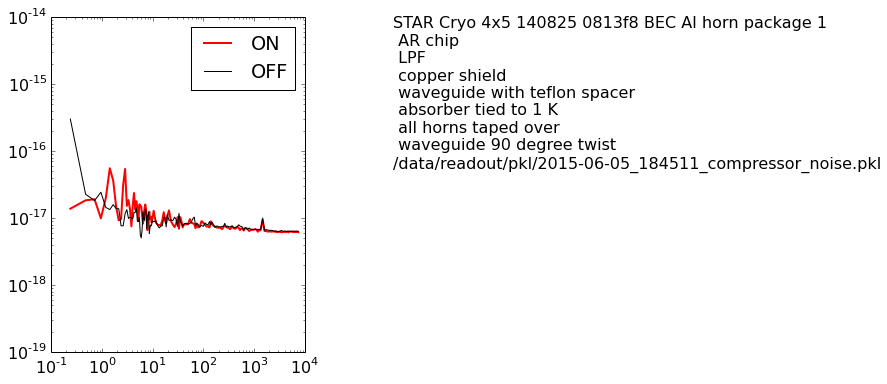

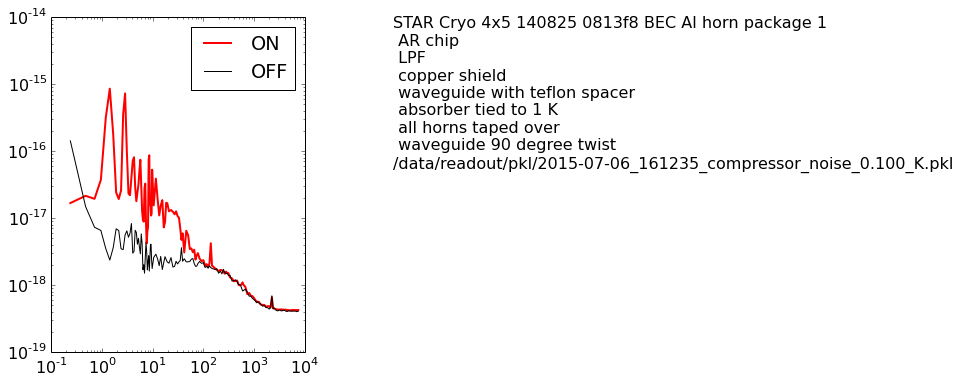

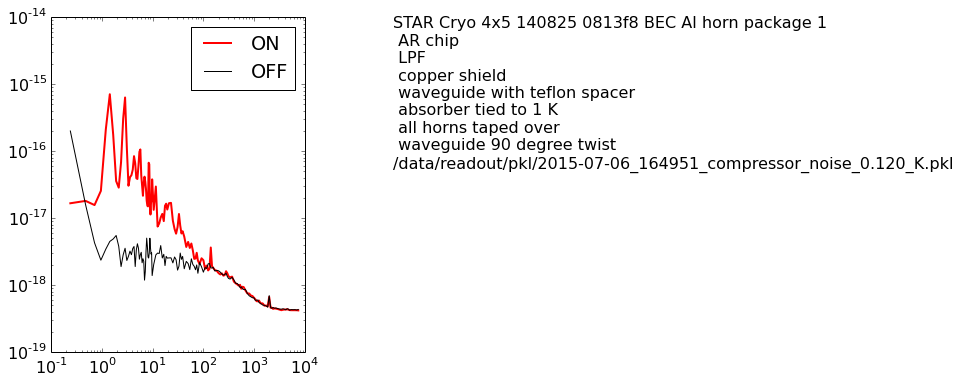

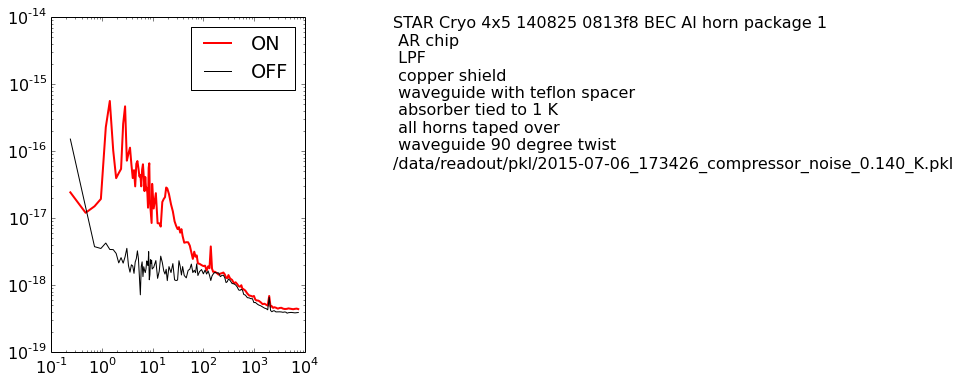

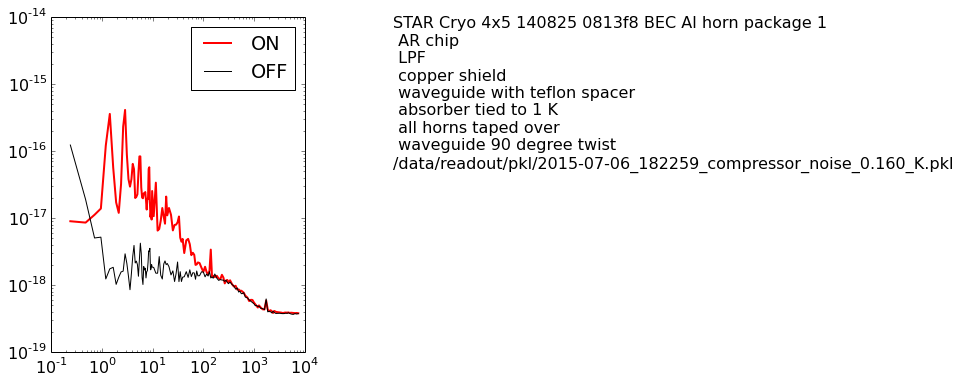

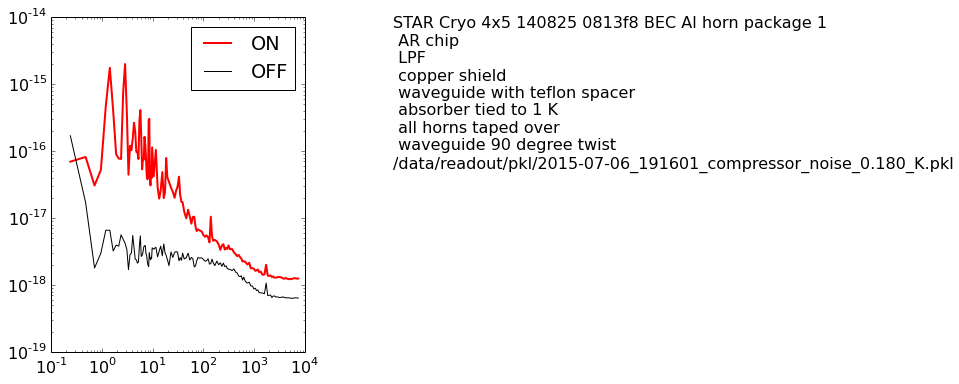

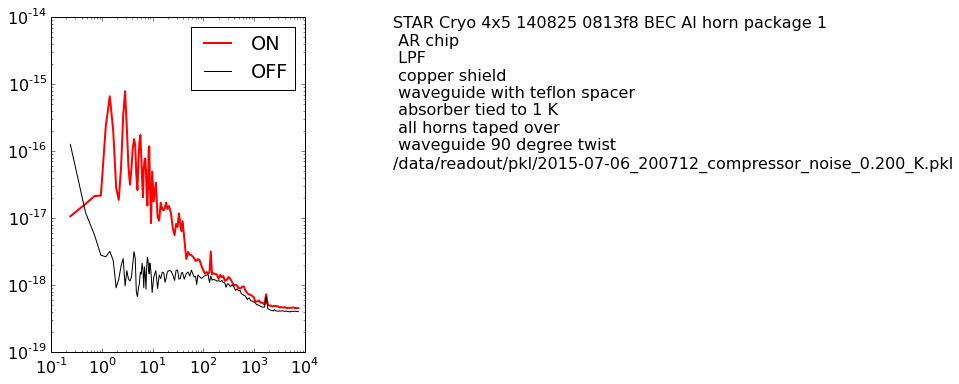

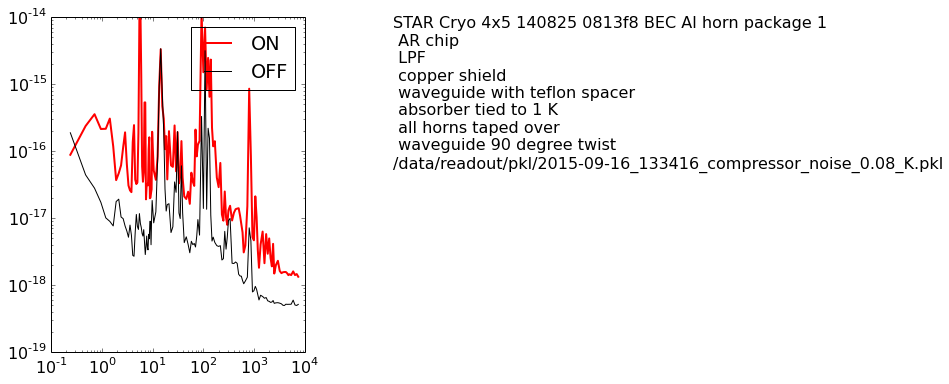

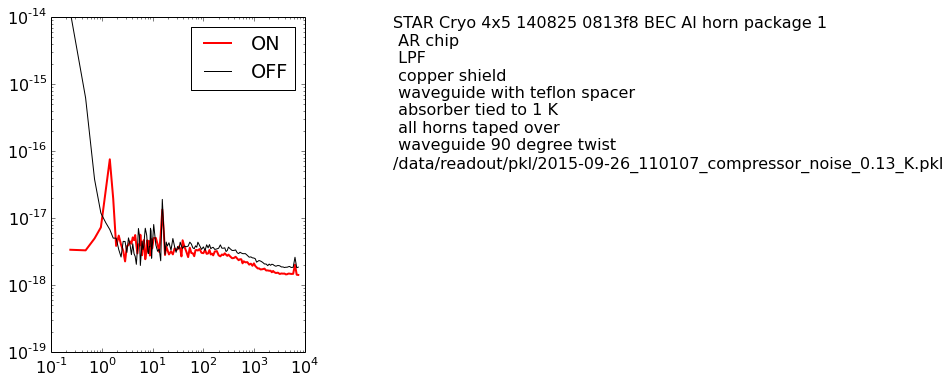

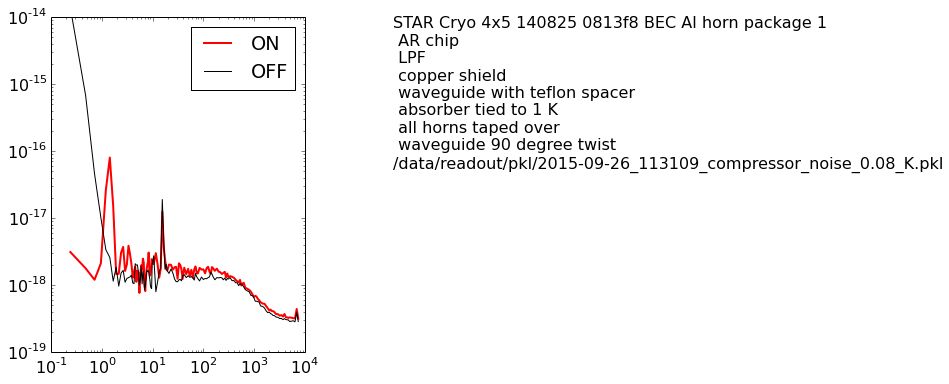

In [81]:
for fn in fns:
    pkls = kid_readout.analysis.archive.load_noise_pkl(fn)
    if len(pkls) == 32:
        on = pkls[2]
        off = pkls[18]
    else:
        on = None
        off = pkls[2]
    fig = figure(figsize=(10,6))
    subplot(1,2,1)
    if on is not None:
        loglog(on.pca_freq,on.pca_eigvals[1,:],'r',lw=2,label='ON')
    loglog(off.pca_freq,off.pca_eigvals[1,:],'k',label='OFF')
    ylim(1e-19,1e-14)
    fig.text(0.6,0.9,s2.experiment_description.replace(',','\n')+'\n'+fn, va='top')
    legend(loc='upper right')